<a href="https://colab.research.google.com/github/ChaeyeonHan/ML_Study/blob/main/Lab01~04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)

1.19.5


In [ ]:
# Build hypothesis and cost
# H(x) = Wx + b
x_data=[1, 2, 3, 4, 5]
y_data=[1, 2, 3, 4, 5]


# 초기값
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis = W * x + b
hypothesis = W * x_data + b

# 오차제곱의 평균
cost = tf.reduce_mean(tf.square(hypothesis - y_data))


## 1.Gradient decent 경사하강법
cost를 최소화하는 W와 b를 찾는 알고리즘이다. 


In [ ]:
import tensorflow as tf
tf.random.set_seed(0)

# Build hypothesis and cost
# H(x) = Wx + b
x_data=[1, 2, 3, 4, 5]
y_data=[1, 2, 3, 4, 5]

# 초기값
W = tf.Variable(2.9)
b = tf.Variable(0.5)

learning_rate = 0.01

for i in range(100):  # 여러번 수행
  # Gradient descent
  with tf.GradientTape() as tape:
      hypothesis = W * x_data + b
      cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  W_grad, b_grad = tape.gradient(cost, [W,b])
  # learning_rate는 gradient를 얼마나 반영할 것인지를 결정
  W.assign_sub(learning_rate * W_grad)  # assign_sub기능 : A -= B
  b.assign_sub(learning_rate * b_grad)
  if i % 10 == 0:
    print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    2.4520|     0.376| 45.660004
   10|    1.1036|  0.003398|  0.206336
   20|    1.0128|  -0.02091|  0.001026
   30|    1.0065|  -0.02184|  0.000093
   40|    1.0059|  -0.02123|  0.000083
   50|    1.0057|  -0.02053|  0.000077
   60|    1.0055|  -0.01984|  0.000072
   70|    1.0053|  -0.01918|  0.000067
   80|    1.0051|  -0.01854|  0.000063
   90|    1.0050|  -0.01793|  0.000059


In [ ]:
# Cost function in pure python
import numpy as np
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c/len(X)

for feed_W in np.linspace(-3, 5, num=15):  # W의 값이 -3에서 5까지 변하고, 구간을 15개로 나눈다.
  curr_cost = cost_func(feed_W, X, Y)
  print("{:6.3f} | {:10.6f}".format(feed_W, curr_cost))


# Cost function in TensorFlow
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = W * X
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print("{:6.3f} | {:10.6f}".format(feed_W, curr_cost))
  

-3.000 |  74.666667
-2.429 |  54.857143
-1.857 |  38.095238
-1.286 |  24.380952
-0.714 |  13.714286
-0.143 |   6.095238
 0.429 |   1.523810
 1.000 |   0.000000
 1.571 |   1.523810
 2.143 |   6.095238
 2.714 |  13.714286
 3.286 |  24.380952
 3.857 |  38.095238
 4.429 |  54.857143
 5.000 |  74.666667
-3.000 |  74.666667
-2.429 |  54.857143
-1.857 |  38.095238
-1.286 |  24.380952
-0.714 |  13.714286
-0.143 |   6.095238
 0.429 |   1.523810
 1.000 |   0.000000
 1.571 |   1.523810
 2.143 |   6.095238
 2.714 |  13.714286
 3.286 |  24.380952
 3.857 |  38.095238
 4.429 |  54.857143
 5.000 |  74.666667


In [ ]:
# Gradient descent
import tensorflow as tf
tf.random.set_seed(0)

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# W = tf.Variable(tf.random_normal([1], -100., 100.))
W = tf.Variable([5.0])
for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
      print("{:5} | {:10.4f} | {:10.6f}".format(step, cost.numpy(), W.numpy()[0]))


    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


## 2.Linear Regression 구현
### 1. build graph  2. feed data and run graph  3. update variables in the graph

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# H(x) = Wx + b
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 여기서 Variable은 tensorflow가 학습하는 과정에서 변경시키는 data
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# 우리의 hypothesis XW + b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  # reduce_mean:평균내주는 기능

# GradientDescent -> Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost) # 그래프 구현까지 완료

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # Variable 초기화

for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))

0 12.056712 [-0.6133708] [0.01404778]
20 0.15674992 [0.61754835] [0.5215166]
40 0.044502575 [0.7455097] [0.5453909]
60 0.039530676 [0.7679427] [0.5243665]
80 0.03589435 [0.77984583] [0.50016195]
100 0.032599755 [0.79028714] [0.47669798]
120 0.029607618 [0.80015194] [0.4542989]
140 0.026890123 [0.80954486] [0.43294895]
160 0.024422035 [0.81849575] [0.41260192]
180 0.022180485 [0.82702583] [0.39321113]
200 0.020144677 [0.8351549] [0.3747316]
220 0.018295715 [0.84290206] [0.3571206]
240 0.016616454 [0.85028505] [0.34033725]
260 0.015091337 [0.857321] [0.3243427]
280 0.013706196 [0.8640265] [0.3090998]
300 0.012448176 [0.87041676] [0.29457325]
320 0.01130564 [0.87650675] [0.28072938]
340 0.010267959 [0.8823104] [0.26753607]
360 0.009325519 [0.88784134] [0.25496286]
380 0.008469587 [0.8931125] [0.24298055]
400 0.00769222 [0.89813566] [0.23156136]
420 0.0069861985 [0.90292305] [0.22067884]
440 0.006344979 [0.9074852] [0.21030773]
460 0.0057626055 [0.9118331] [0.20042405]
480 0.005233688 [0.9

## 동일한 예제 Placeholders를 사용해서
### Placeholder를 사용하면, 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):  # W=1, b=1.1로 예상
  cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], 
                    feed_dict={X:[1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
  if step % 20 == 0:
    print(step, cost_val, W_val, b_val)

0 33.692383 [-0.23619372] [0.7369804]
20 0.0007460189 [0.99934804] [1.0805557]
40 5.1239622e-05 [1.0046055] [1.0832735]
60 4.473654e-05 [1.0043275] [1.0843755]
80 3.906786e-05 [1.0040443] [1.0853988]
100 3.4117882e-05 [1.0037794] [1.0863551]
120 2.979608e-05 [1.0035319] [1.0872487]
140 2.602037e-05 [1.0033005] [1.0880837]
160 2.272388e-05 [1.0030844] [1.0888641]
180 1.9846735e-05 [1.0028825] [1.089593]
200 1.733425e-05 [1.0026939] [1.0902743]
220 1.5136601e-05 [1.0025173] [1.0909114]
240 1.3219096e-05 [1.0023525] [1.0915067]
260 1.1544102e-05 [1.0021985] [1.0920628]
280 1.0081972e-05 [1.0020545] [1.0925827]
300 8.8045535e-06 [1.0019199] [1.0930685]
320 7.689412e-06 [1.0017942] [1.0935224]
340 6.71453e-06 [1.0016767] [1.0939466]
360 5.864031e-06 [1.0015669] [1.094343]
380 5.1215293e-06 [1.0014642] [1.0947133]
400 4.473428e-06 [1.0013685] [1.0950594]
420 3.906081e-06 [1.0012789] [1.0953829]
440 3.411425e-06 [1.0011952] [1.0956852]
460 2.9796333e-06 [1.0011169] [1.0959677]
480 2.602096e-0

In [ ]:
# Testing model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[6.1000094]
[3.5999937]
[2.5999875 4.6      ]


## 3.Linear Regression의 cost 최소화 구현

Instructions for updating:
non-resource variables are not supported in the long term


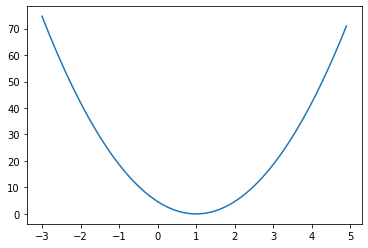

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())  #초기화
W_val = []
cost_val= []
for i in range(-30, 50):
  feed_W = i * 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict = {W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data=[1, 2, 3]
y_data=[1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# our hypothesis for linear model X*W
hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize : gradient descent using derivative: W -= learning_rate * deriavative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y)* X)
descent = W - learning_rate*gradient
update = W.assign(descent)

# 위에 minimize 대신해서 사용
# Minimize: gradient descent magic (미분안하고 cost최소로)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)


sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
  sess.run(update, feed_dict= {X: x_data, Y: y_data})
  print(step, sess.run(cost, feed_dict= {X: x_data, Y: y_data}), sess.run(W))
# step, cost, W값 순서로 출력된다
# cost는 점점 작아지고, W는 1에 가까워진다. 

0 2.351231 [0.590189]
1 0.6687945 [0.7814341]
2 0.19023475 [0.88343155]
3 0.054111283 [0.93783015]
4 0.015391602 [0.9668428]
5 0.004378054 [0.98231614]
6 0.0012453274 [0.9905686]
7 0.00035422426 [0.9949699]
8 0.00010076069 [0.99731725]
9 2.8661532e-05 [0.9985692]
10 8.15262e-06 [0.9992369]
11 2.3188638e-06 [0.999593]
12 6.5988814e-07 [0.9997829]
13 1.8749729e-07 [0.99988425]
14 5.3383587e-08 [0.99993825]
15 1.5222117e-08 [0.99996704]
16 4.322164e-09 [0.9999824]
17 1.229342e-09 [0.99999064]
18 3.5095127e-10 [0.999995]
19 1.0168222e-10 [0.9999973]
20 2.8649083e-11 [0.99999857]


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# tf graph input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)
hypothesis = X * W  # Linear Model
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: *Gradient Descent Magic*
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
 
sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
  print(step, sess.run(W))
  sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


## 4.Multi variable Linear Regression(다변수 선형회귀)


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# data and label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
Y = [152., 185., 180., 196., 142.]


# random weights (변수 3개, weight 3개)
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
  # tf.GradientTape() to record the gradient of the cost function
  with tf.GradientTape() as tape:
    hypothesis = w1*x1 + w2*x2 + w3*x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis-Y))
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
  
  w1.assign_sub(learning_rate * w1_grad)  # 값을 업데이트
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy()))



Instructions for updating:
non-resource variables are not supported in the long term


AttributeError: ignored

행렬을 사용하여 간단하게 나타내기
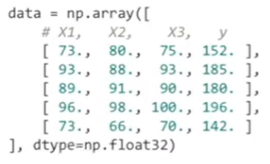

-> 데이터 슬라이싱  
x = data[:, :-1]  콤마를 기준으로 행, 열을 의미
-마지막 열을 제외한 행렬

y = data[:, [-1]]  콜론앞뒤 아무것도X -> 처음부터 끝까지를 의미 
-[-1]: 마지막 열을 의미

In [ ]:
data = np.array([
                 [73., 80., 75., 152.],
                 [93., 88., 93., 185.],
                 [89., 91., 90., 180.],
                 [96., 98., 100., 196.],
                 [73., 66., 70., 142.],
])

x = data[:, :-1]
y = data[:, [-1]]

W = tf,Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

learning_rate = 0.000001

def predict(X):
  return tf.matmul(X, W) + b

n_epochs = 2000
for i in range(n_epochs+1):
  # record the gradient of the cost function
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean(tf.square(predict(X)-Y))
  W_grad, b_grad = tape.gradient(cost, [W, b])
  
  W.assign_sub(learning_rate * W_grad)  # 값을 업데이트
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))


